In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sys.path.insert(1, r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\tracking")
sys.path.insert(1, r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\utils")
from parameters import *
from other_hough_transform import new_method_tracks, old_method_tracks
from track_reconstruction import plot_hits
import artificial_tracks as ct
from hit import Hit
from track import Track
from data_loading import load_dataset
import os
import fnmatch
import pandas as pd

In [2]:
# Define the paths needed
raw_data_directory = r"C:\Users\nelg\Desktop\Cours\Labo\TP4\raw_data\\" #path to the ecal data
current_directory = os.getcwd()
data_storage = r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\muon_decay\extracted_data\\"
run = "run_000420"  # List of the runs to analyse. If empty, the program will go through all the data available in the raw_data directory
suffix = "" # If one wants to re-run on already analysed data without overwriting the extracted data
separator = "\\" # "/" if linux of mac

In [3]:
# Load the data
files = fnmatch.filter(os.listdir(raw_data_directory+run), '*.root')

for i,file in enumerate(files):
    if i == 0:
        df = [load_dataset(raw_data_directory+run+separator+file)]
    else:
        df_i = load_dataset(raw_data_directory+run+separator+file)
        df_i.index += df[-1].index[-1]+1
        df.append(df_i)

df_hits_total = pd.concat(df)
df_hits = pd.DataFrame.copy(df_hits_total, deep=True)

og_len = len(df_hits_total)

df_hits.query('n_hits > 6', inplace=True)
df_hits.query('n_hits < 50', inplace=True)

new_len = len(df_hits)

print('selected {:.2f}% of all events'.format(new_len/og_len * 100))

selected 17.49% of all events


In [4]:
import sys
sys.path.insert(1,r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\tracking")
from track_reconstruction import plot_hits
import numpy as np
from IPython import display
good_events = np.loadtxt(data_storage+"events_indices_"+run+".txt").astype('int')

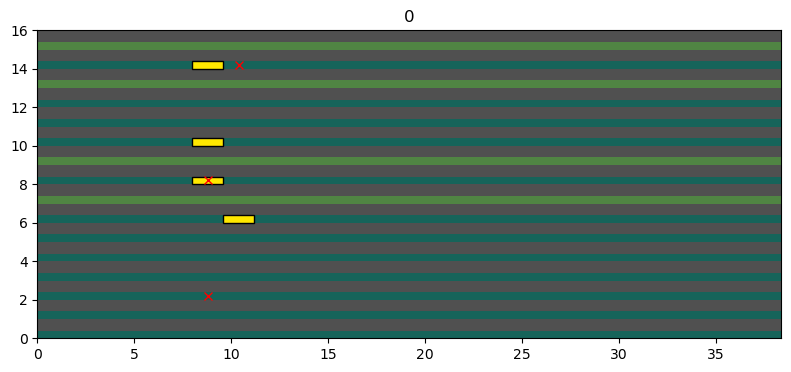

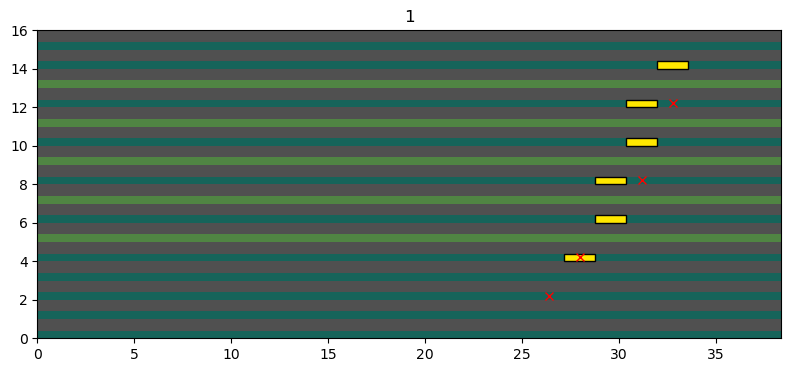

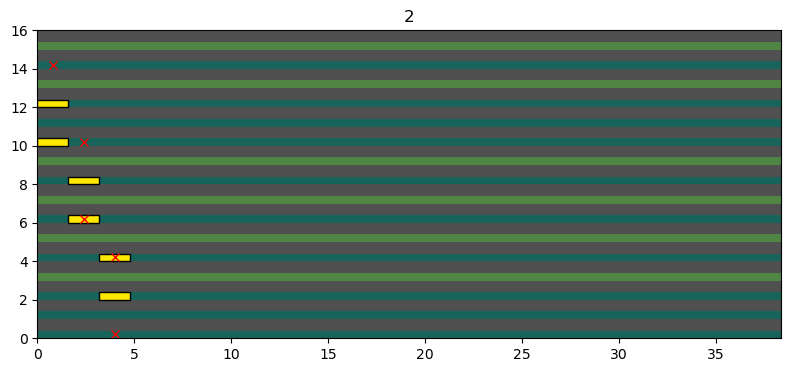

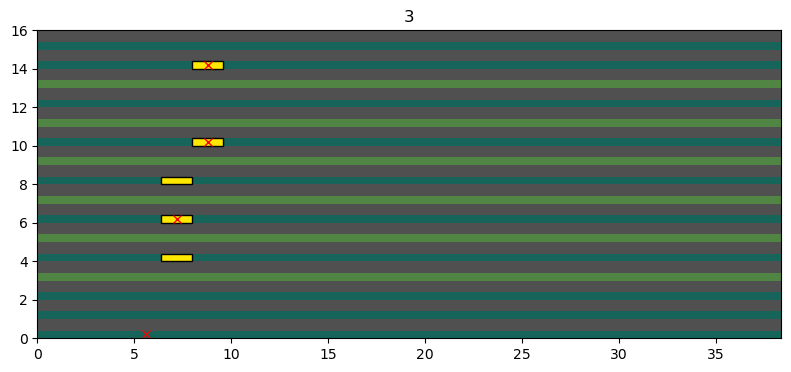

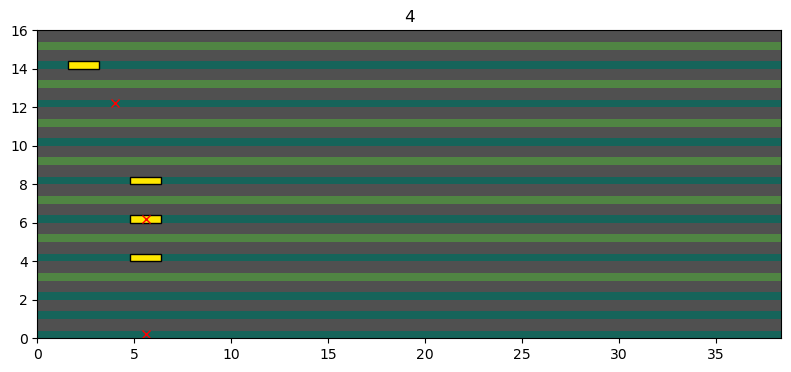

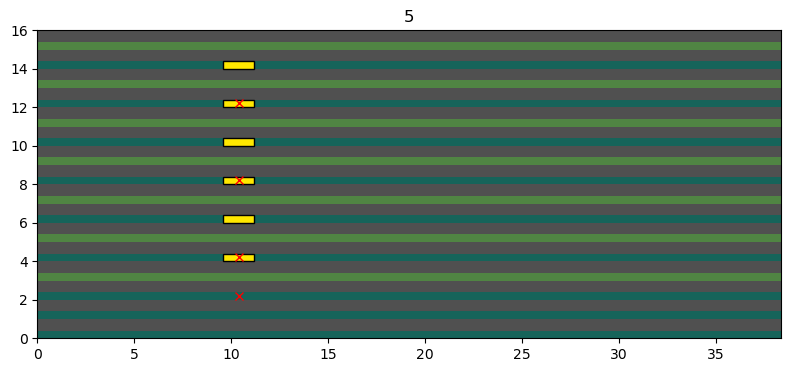

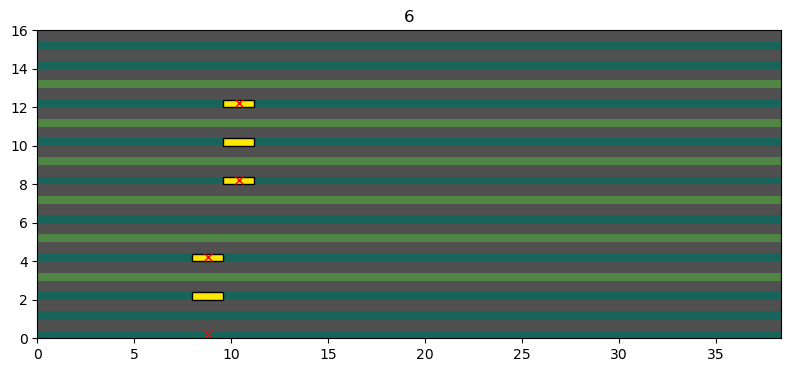

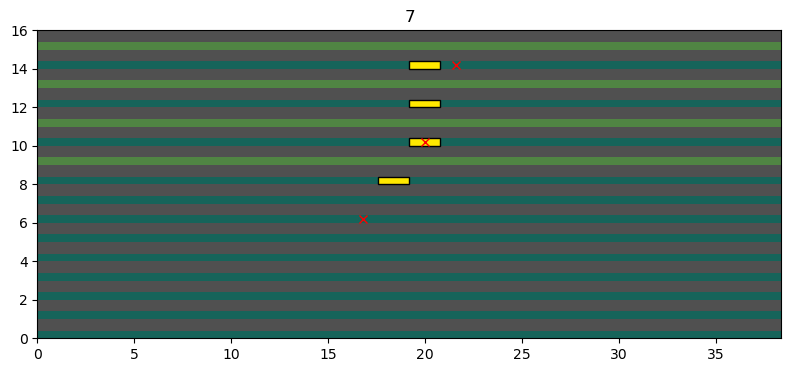

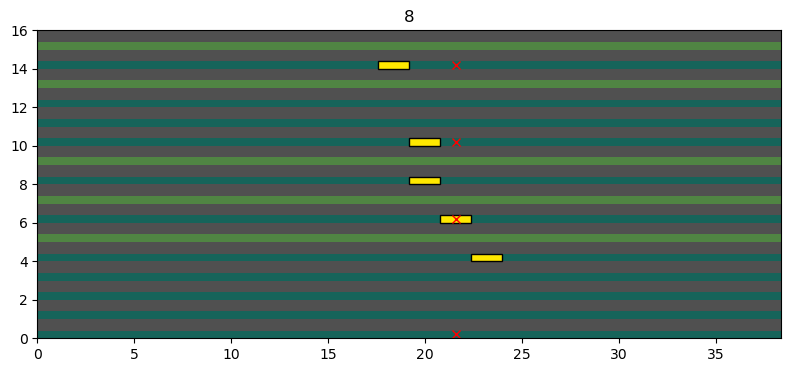

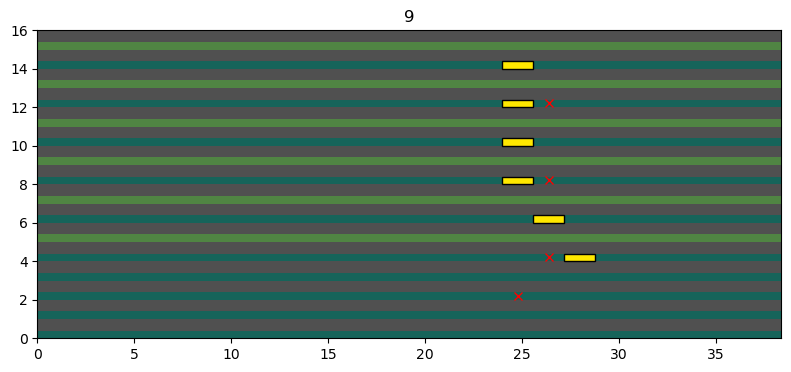

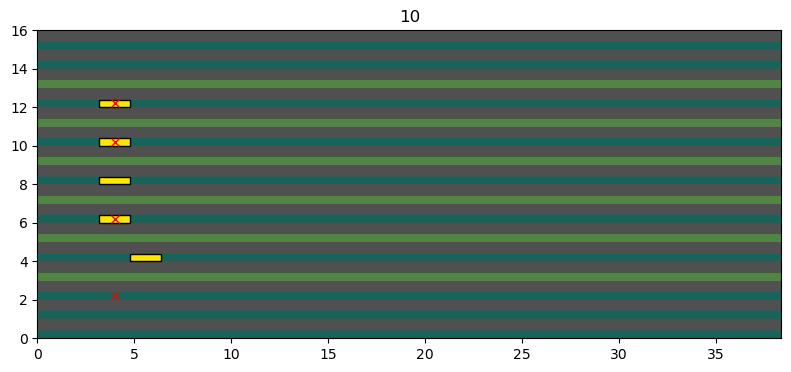

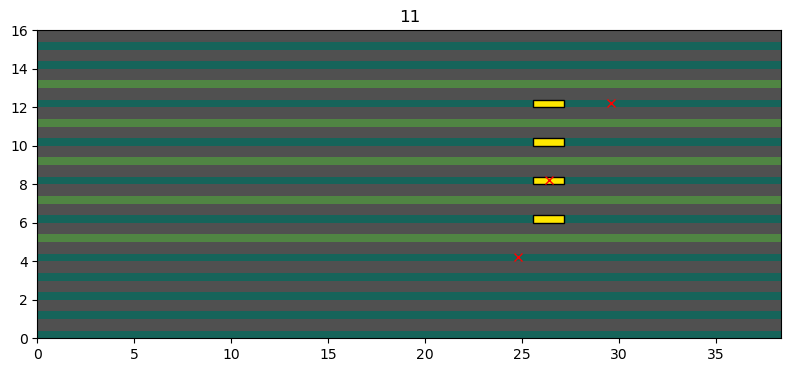

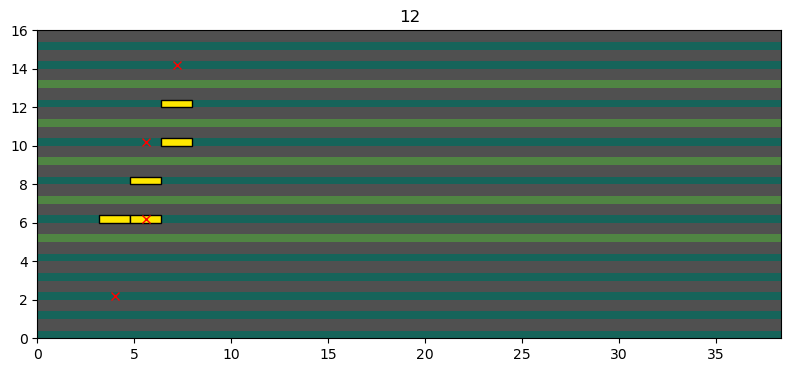

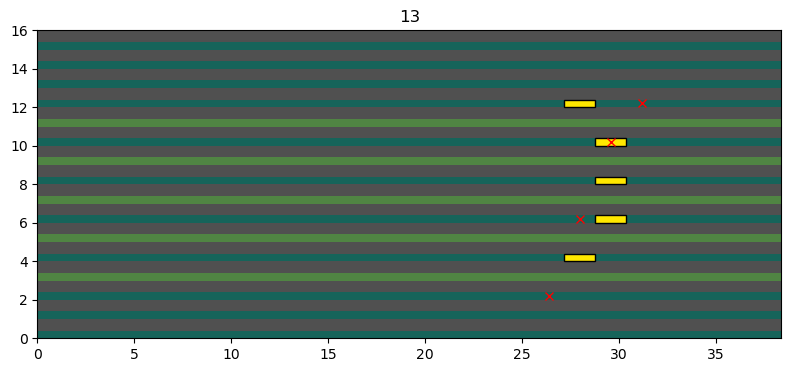

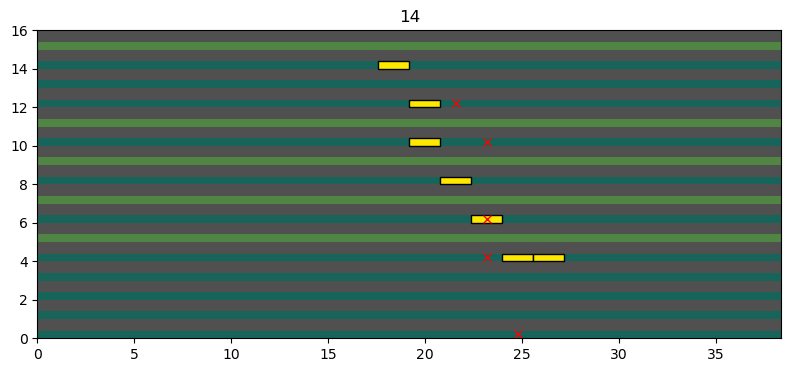

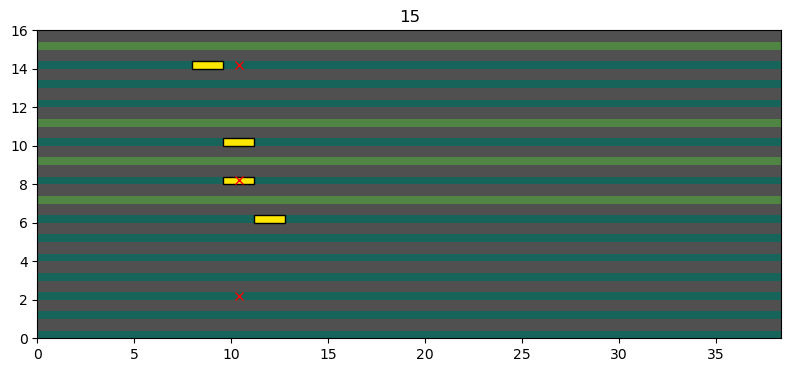

In [5]:
%matplotlib inline
i = 0
kb = ""
while kb == "":
    event = df_hits.loc[good_events[i]]
    hits = [Hit(event,i) for i in range(event['n_hits'])]
    hitsX = [h for h in hits if h.is_sidex]
    track = Track(hitsX)
    fig,ax = plot_hits(hits,True,True,scaling=0.5)
    ax.set_title(i)
    pos = track.kalman_filter(sigma=1)
    pos = np.array(pos)
    ax.plot(pos[:,0],pos[:,1],'rx') 
    display.clear_output(wait=False)
    display.display(fig)
    kb = input()
    i = i+1
display.clear_output(wait=False)

d =  2.3979383868115636


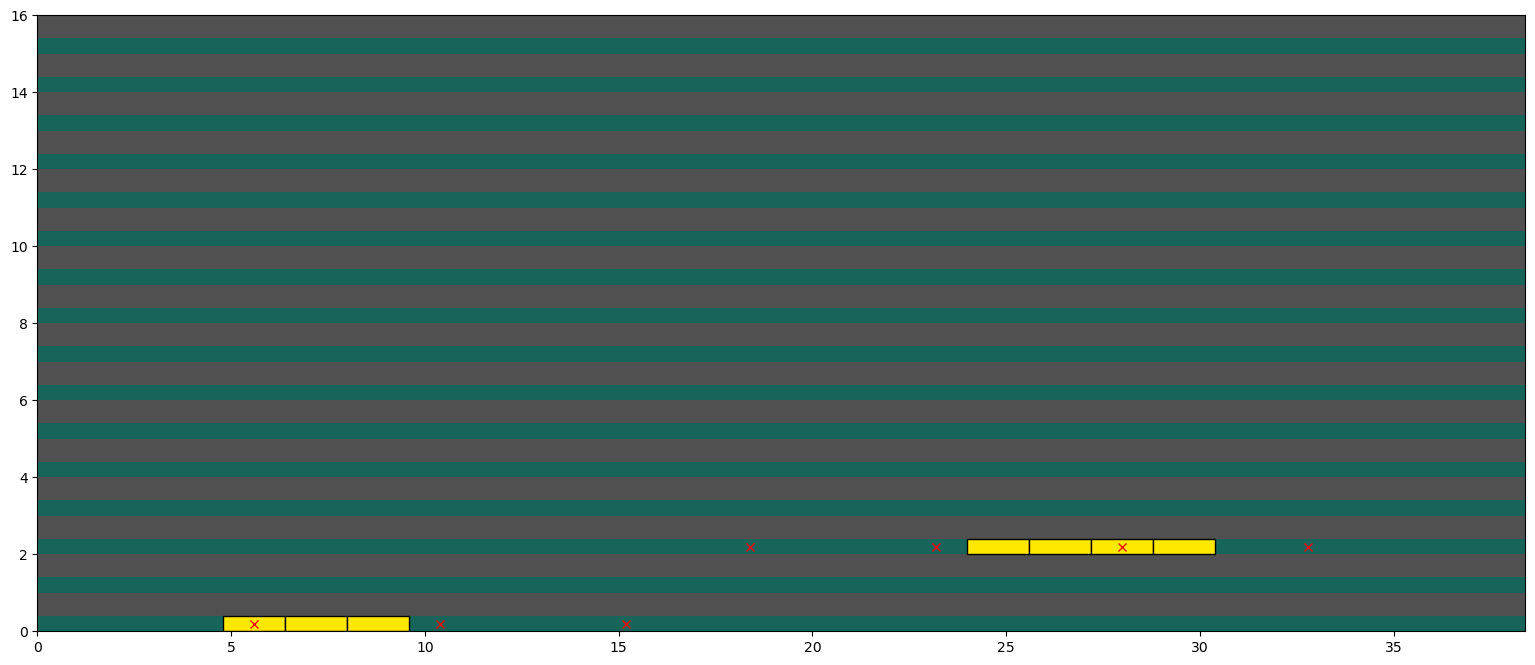

In [1]:
import sys
import numpy as np
sys.path.insert(1,r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\tracking")
from track import Track
from artificial_tracks import create_artificial_tracks_geom
from track_reconstruction import plot_hits
import matplotlib.pyplot as plt

t = 10
x0 = 5

hits = create_artificial_tracks_geom(t,x0,sidex=True)
fig,ax = plot_hits(hits)

track = Track(hits)
pos = track.kalman_filter(sigma=1)
pos = np.array(pos)
ax.plot(pos[:,0],pos[:,1],'rx')

In [10]:
event = df_hits.loc[good_events[1]]
hits = [Hit(event,i) for i in range(event['n_hits'])]
for hit in hits:
    print(hit.coord, hit.is_sidex," : " , hit.value)

[10, 3] True  :  1.1150838
[12, 2] True  :  0.2696326
[3, 6] True  :  -1.4547188
[10, 5] False  :  -0.20422728
[4, 6] True  :  -0.30183458
[1, 7] True  :  -0.8132438
[6, 5] True  :  -0.5526813
[8, 3] False  :  -1.8887851
[11, 6] False  :  2.5768433
[9, 4] False  :  1.8205637
[7, 2] False  :  -0.8084219
[13, 1] True  :  -0.08375966
[8, 4] True  :  0.6242844
[6, 1] False  :  -1.4000198
